In [1]:
import ctfr_bm as ctfr
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (8.1, 4)
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'serif'
#plt.rcParams['text.usetex'] = True

In [3]:
AUDIO_PATH = ctfr.fetch_sample("guitarset")
SR = 22050
OFFSET = 5.0
DURATION = 4.0

N_FFT = 2048
HOP_LENGTH = 256
WIN_LENGTHS = [512, 1024, 2048]

SAVE_PLOTS = True
PLOTS_REL_PATH = "plots"

In [4]:
signal, sr = ctfr.load(AUDIO_PATH, sr=SR, offset=OFFSET, duration=DURATION)
specs = [ctfr.stft_spec(signal, win_length=l, n_fft=N_FFT, hop_length=HOP_LENGTH) for l in WIN_LENGTHS]
print(f"Spectrogram shape: {specs[0].shape}")

Spectrogram shape: (1025, 345)


In [5]:
def plot_specrogram(spec, filename, format="eps", dpi=600, vmin=None, vmax=None):
    fig, ax = plt.subplots(1, 1, tight_layout=True)

    img = ctfr.specshow(ctfr.power_to_db(spec, ref=1.0), sr=SR, hop_length=HOP_LENGTH, x_axis="time", y_axis="linear", vmin=vmin, vmax=vmax, ax=ax, cmap="inferno")
    #plt.ylim(0, 5000)
    plt.xlabel("time (s)")
    plt.ylabel("freq. (Hz)")
    
    cbar = plt.colorbar(img, format="%+2.0f dB");
    cbar.ax.tick_params(labelsize=plt.rcParams['xtick.labelsize']) 

    if SAVE_PLOTS:
        plt.savefig(os.path.join(PLOTS_REL_PATH, filename), format=format, dpi=dpi)

    return fig, ax, img

---

In [6]:
VMIN_SPEC = -70.0
VMAX_SPEC = 10.0

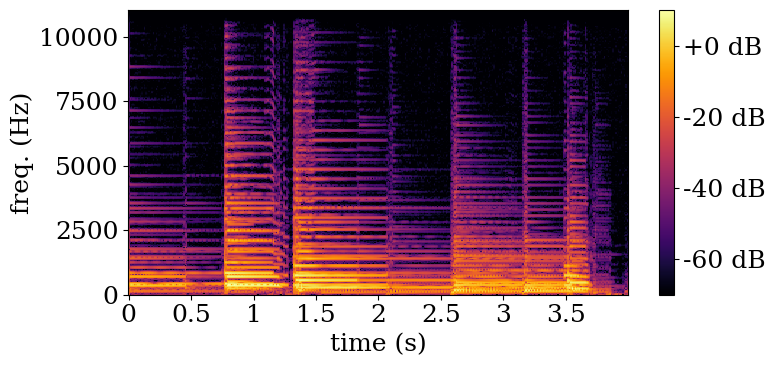

In [7]:
_, _, img = plot_specrogram(specs[0], "spec_512.eps", vmin=VMIN_SPEC, vmax=VMAX_SPEC);

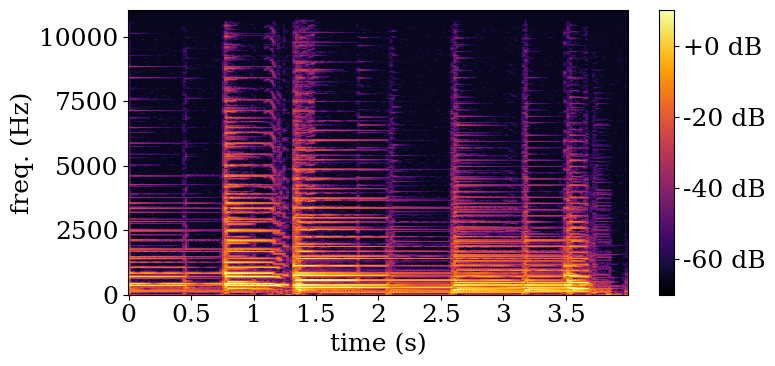

In [8]:
plot_specrogram(specs[1], "spec_1024.eps", vmin=VMIN_SPEC, vmax=VMAX_SPEC);

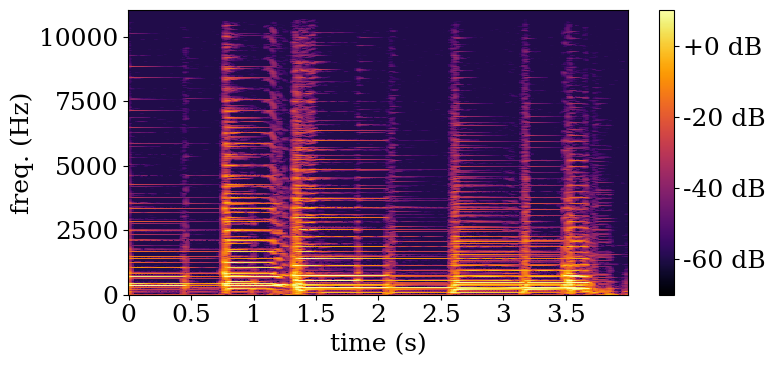

In [9]:
plot_specrogram(specs[2], "spec_2048.eps", vmin=VMIN_SPEC, vmax=VMAX_SPEC);

---

In [10]:
def relative_error_spec(ref_spec, comp_spec):
    return np.abs((comp_spec - ref_spec) / ref_spec)

In [11]:
cspec_sls = ctfr.methods.baseline_sls_from_specs(specs)

In [12]:
cspec_sls_h_50 = ctfr.methods.sls_h_from_specs(specs, energy_criterium_db = -50.0)#, input_energy = sls_energy, normalize_output=True)

In [108]:
cspec_sls_h_40 = ctfr.methods.sls_h_from_specs(specs, energy_criterium_db = -40.0)#, input_energy = sls_energy, normalize_output=True)

In [109]:
cspec_sls_h_20 = ctfr.methods.sls_h_from_specs(specs, energy_criterium_db = -20.0)#, input_energy = sls_energy, normalize_output=True)

In [110]:
cspec_sls_i_default = ctfr.methods.sls_i_from_specs(specs, interp_steps=[[4, 1], [2, 2], [1, 4]])#, input_energy = sls_energy, normalize_output=True)

In [111]:
cspec_sls_i_doubled = ctfr.methods.sls_i_from_specs(specs, interp_steps=[[8, 2], [4, 4], [2, 8]])#, input_energy = sls_energy, normalize_output=True)

----

In [112]:
VMIN_DIFF = -40.0
VMAX_DIFF = 20.0

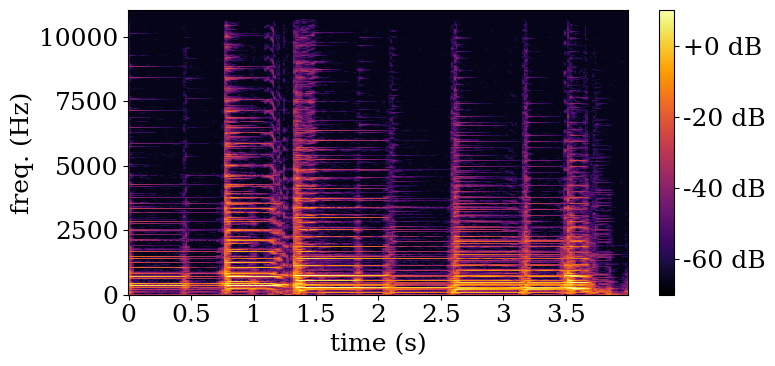

In [113]:
plot_specrogram(cspec_sls, "cspec_sls.eps", vmin=VMIN_SPEC, vmax=VMAX_SPEC);

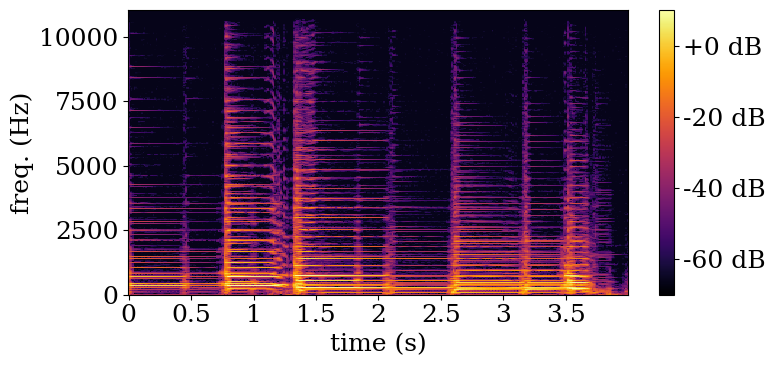

In [114]:
plot_specrogram(cspec_sls_h_50, "cspec_sls_h_50.eps", vmin=VMIN_SPEC, vmax=VMAX_SPEC);

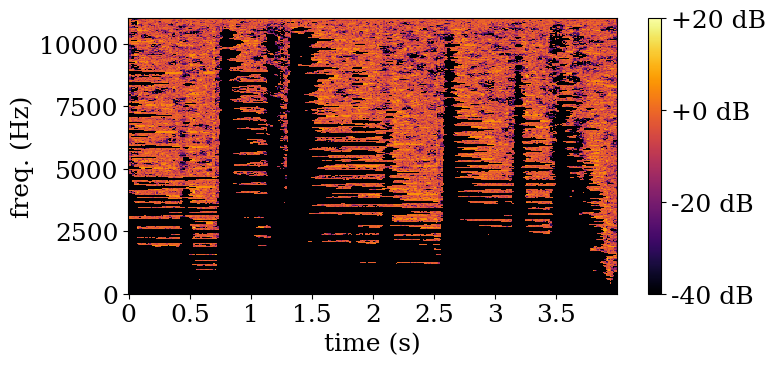

In [115]:
diff_cspec_sls_h_50 = relative_error_spec(cspec_sls, cspec_sls_h_50)
fig, ax, img = plot_specrogram(diff_cspec_sls_h_50, "rel_cspec_sls_h_50.eps", vmin=VMIN_DIFF, vmax=VMAX_DIFF);

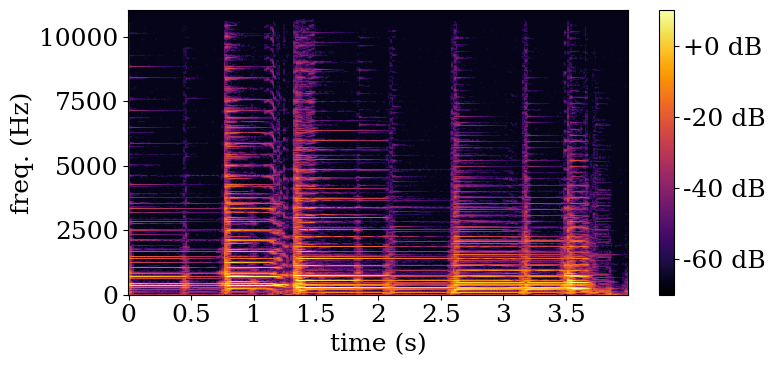

In [116]:
plot_specrogram(cspec_sls_h_40, "cspec_sls_h_40.eps", vmin=VMIN_SPEC, vmax=VMAX_SPEC);

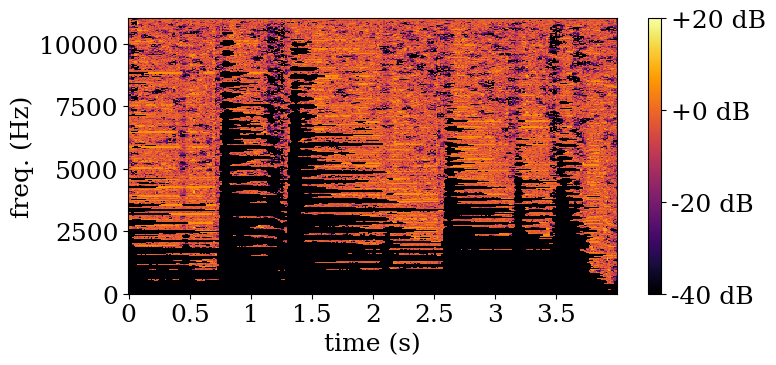

In [117]:
diff_cspec_sls_h_40 = relative_error_spec(cspec_sls, cspec_sls_h_40)
plot_specrogram(diff_cspec_sls_h_40, "rel_cspec_sls_h_40.eps", vmin=VMIN_DIFF, vmax=VMAX_DIFF);

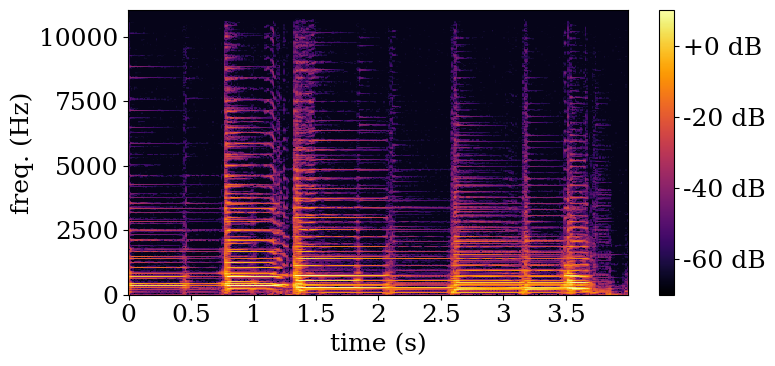

In [118]:
plot_specrogram(cspec_sls_h_20, "cspec_sls_h_20.eps", vmin=VMIN_SPEC, vmax=VMAX_SPEC);

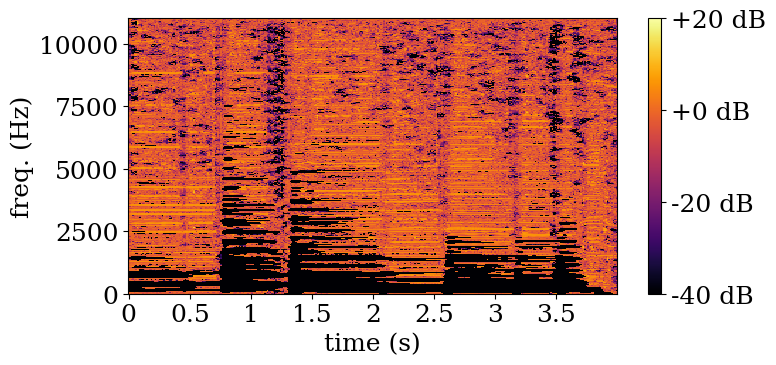

In [119]:
diff_cspec_sls_h_20 = relative_error_spec(cspec_sls, cspec_sls_h_20)
plot_specrogram(diff_cspec_sls_h_20, "rel_cspec_sls_h_20.eps", vmin=VMIN_DIFF, vmax=VMAX_DIFF);

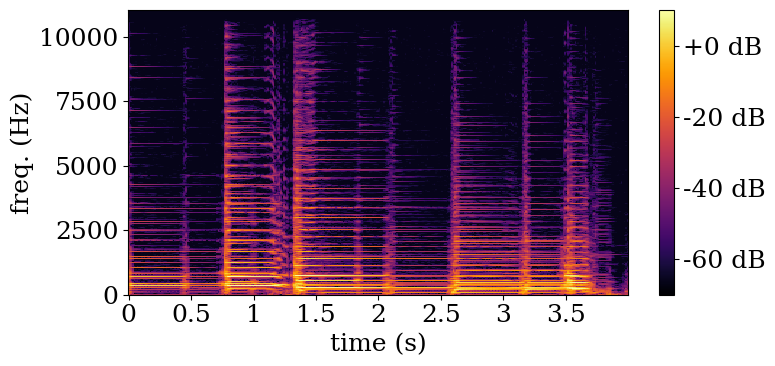

In [120]:
plot_specrogram(cspec_sls_i_default, "cspec_sls_i.eps", vmin=VMIN_SPEC, vmax=VMAX_SPEC);

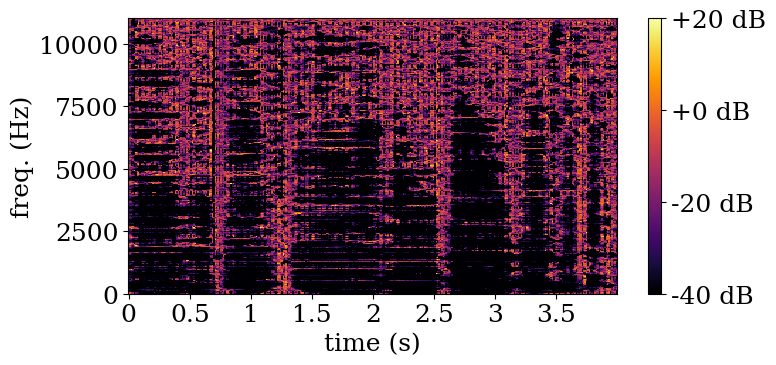

In [121]:
diff_cspec_sls_i_default = relative_error_spec(cspec_sls, cspec_sls_i_default)
plot_specrogram(diff_cspec_sls_i_default, "rel_cspec_sls_i_default.eps", vmin=VMIN_DIFF, vmax=VMAX_DIFF);

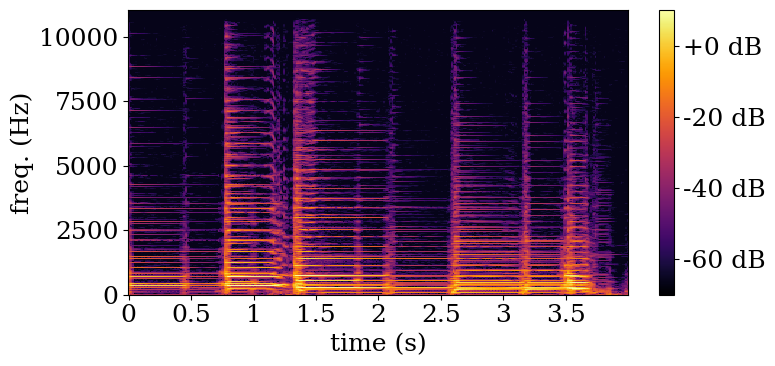

In [122]:
plot_specrogram(cspec_sls_i_doubled, "cspec_sls_i_doubled.eps", vmin=VMIN_SPEC, vmax=VMAX_SPEC);

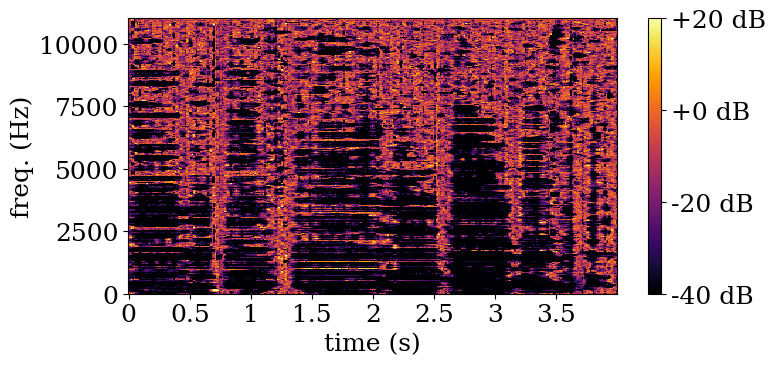

In [123]:
diff_cspec_sls_i_doubled = relative_error_spec(cspec_sls, cspec_sls_i_doubled)
plot_specrogram(diff_cspec_sls_i_doubled, "rel_cspec_sls_i_doubled.eps", vmin=VMIN_DIFF, vmax=VMAX_DIFF);